In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return f(*args, **kwds)


In [2]:
test_result = pd.read_csv("6-3-1-logistic-regression.csv")
test_result.head()

,hours,result
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


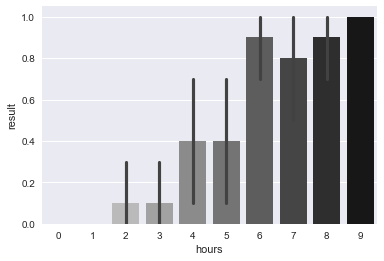

In [3]:
sns.barplot(x = "hours", y = "result", data = test_result, palette = "gray_r")

In [5]:
test_result.groupby("hours").mean()

,result
hours,
0,0.0
1,0.0
2,0.1
3,0.1
4,0.4
5,0.4
6,0.9
7,0.8
8,0.9


In [6]:
mod_glm = smf.glm(formula = "result ~ hours",
                 data = test_result,
                 family=sm.families.Binomial()).fit()

In [7]:
mod_glm

In [8]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 06 May 2018   Deviance:                       68.028
Time:                        21:25:57   Pearson chi2:                     84.9
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

 # モデルの選択

In [9]:
mod_glm_null = smf.glm(
    "result ~ 1",data = test_result, 
    family=sm.families.Binomial()).fit()

In [11]:
print("Nullモデル：{:.3f}".format(mod_glm_null.aic.round(3)))
print("変数入りモデル：{:.3f}".format(mod_glm.aic.round(3)))

Nullモデル：139.989
変数入りモデル：72.028


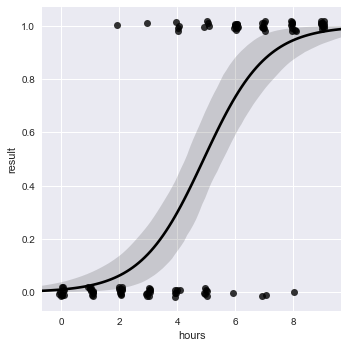

In [12]:
sns.lmplot(x = "hours", y = "result", 
          data = test_result,
          logistic = True,
          scatter_kws = {"color":"black"},
          line_kws = {"color":"black"},
          x_jitter = 0.1, y_jitter = 0.02)

In [14]:
exp_val = pd.DataFrame({
    "hours":np.arange(0, 10 ,1)
})
print(exp_val)
# 成功確率の予測値
pred = mod_glm.predict(exp_val)
pred

   hours
0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9


0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64